In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
data = yf.download('TSLA', start = '2024-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [4]:
data.columns = [col[1] if col[0] == 'TSLA' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


<Axes: xlabel='Date'>

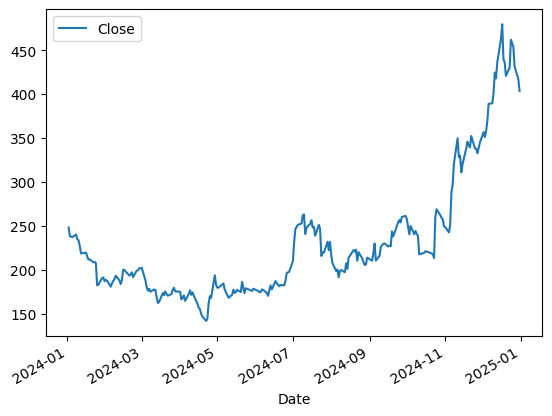

In [5]:
data.dropna
data.plot(x = 'Date', y = "Close")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

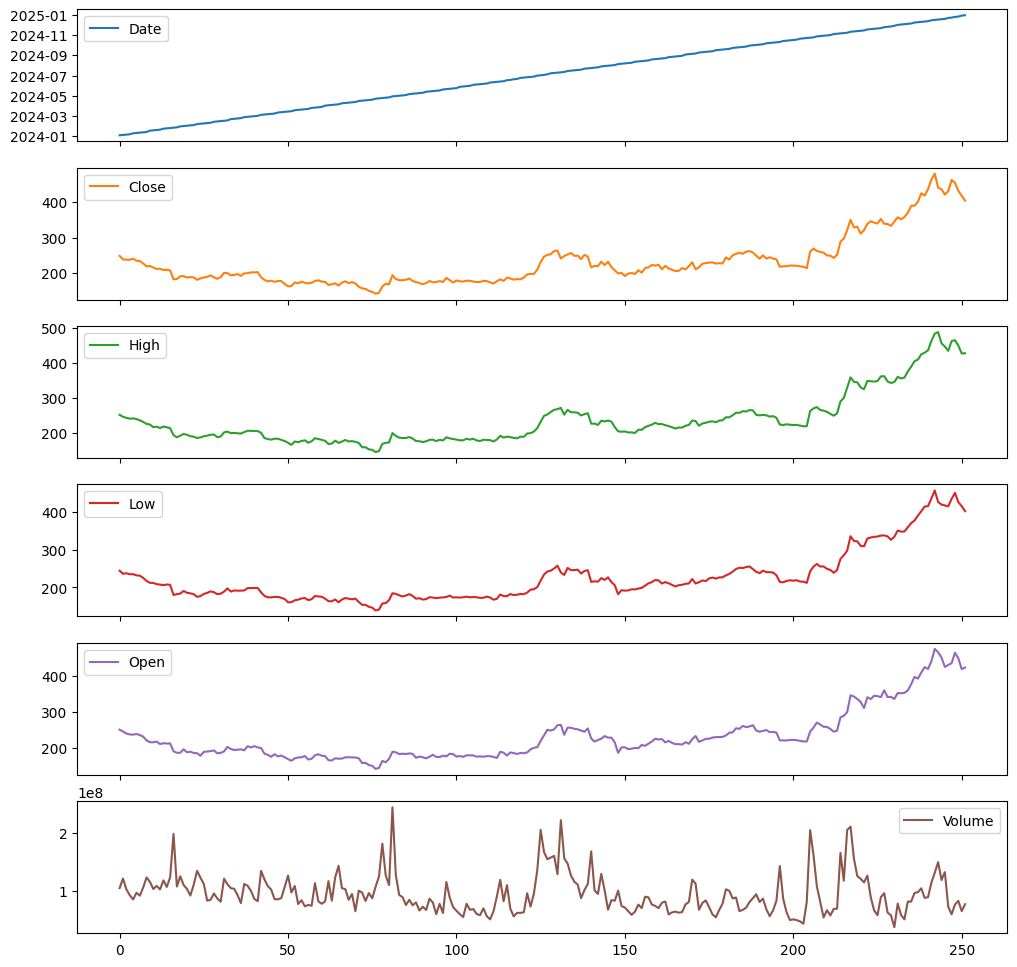

In [6]:
data.plot(kind = "line", figsize = (12, 12), subplots = True)

In [7]:
X = data[['Open','High', 'Low', 'Volume']]
Y = data["Close"]

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

In [10]:
parameter_grid = {
    'kernel': ["linear", "rbf", "poly", "sigmoid"],
    'C': [1, 10, 100],
    'epsilon': [0.1, 1, 10],
    'gamma': ["scale", "auto", "float"],
    'max_iter': [100, 1000, 5000, 10000]
}    

In [11]:
model = SVR()
GSV = GridSearchCV(estimator = model, param_grid = parameter_grid, cv = 5)

In [12]:
GSV.fit(xtrain, ytrain)

,estimator,SVR()
,param_grid,"{'C': [1, 10, ...], 'epsilon': [0.1, 1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [13]:
print("Best Prarameters:", GSV.best_params_)

Best Prarameters: {'C': 100, 'epsilon': 10, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 1000}


In [14]:
print("Best Score:", GSV.best_score_)

Best Score: -0.007429555412883593


In [15]:
best_model = GSV.best_estimator_
y_pred = best_model.predict(xtest)
residuals = ytest - y_pred
df = pd.DataFrame({
    "Actual values": ytest,
    "Predicted values": y_pred,
    "Residuals": residuals
})
df.head()

,Actual values,Predicted values,Residuals
165,205.750000,226.141521,-20.391521
6,233.940002,226.141521,7.798482
111,170.660004,226.141521,-55.481517
172,216.270004,226.141521,-9.871516
115,187.440002,226.141521,-38.701518


In [16]:
MSE = mean_squared_error(ytest, y_pred)
rsquared = r2_score(ytest, y_pred)
print(f"MSE: {MSE:.2f}, R-squared: {rsquared:.2f}")

MSE: 5454.83, R-squared: -0.00
